In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import functions as fn

import pickle

In [2]:
DATA_PATH = '../../data/box_builder_dataset/feature_frame.'
DATA_FORMAT = 'csv'

In [3]:
products = pd.read_csv(DATA_PATH + DATA_FORMAT)

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

First we need to group the data by order_id and count the number of products in each order. Then we filter the orders with at least 5 products.

In [5]:
products_ordered = products[products['outcome'] == 1]

In [6]:
orders_len = products_ordered.groupby('order_id')['variant_id'].count()
orders_over_eq_5 = orders_len[orders_len >= 5].index

In [7]:
products_filtered = products[products['order_id'].isin(orders_over_eq_5)]

Creation of variables that may be useful:

In [8]:
products_sorted = products_filtered.sort_values(by=['user_id', 'order_date'], ascending=[True, False])
last_ordered_products = products_sorted.groupby(['user_id', 'variant_id']).first().reset_index()

In [9]:
times_ordered = products_filtered.groupby(['user_id', 'variant_id'])['outcome'].sum().reset_index().rename(columns={'outcome': 'times_ordered'})
last_ordered_products = last_ordered_products.merge(times_ordered, on=['user_id', 'variant_id'], how='left')

In [10]:
last_ordered_products['days_to_purchase_variant_id_norm'] = (last_ordered_products['avg_days_to_buy_variant_id'] - last_ordered_products['days_since_purchase_variant_id']) / last_ordered_products['std_days_to_buy_variant_id']

last_ordered_products['days_to_purchase_variant_id_if_ordered_before'] = last_ordered_products['days_since_purchase_variant_id'] * last_ordered_products['ordered_before']

In [11]:
last_ordered_products['days_to_purchase_product_type_norm'] = (last_ordered_products['avg_days_to_buy_product_type'] - last_ordered_products['days_since_purchase_product_type']) / last_ordered_products['std_days_to_buy_product_type']

In [12]:
y = last_ordered_products['outcome'].copy()

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = fn.train_val_test_split(last_ordered_products, y)

In [14]:
X_train_index = X_train.index
X_val_index = X_val.index
X_test_index = X_test.index
y_train_index = y_train.index
y_val_index = y_val.index
y_test_index = y_test.index

In [15]:
def train_val_test_split_from_reference(X: pd.DataFrame, y: pd.Series):
    X_train_i = X.loc[X_train_index]
    X_val_i = X.loc[X_val_index]
    X_test_i = X.loc[X_test_index]
    y_train_i = y.loc[y_train_index]
    y_val_i = y.loc[y_val_index]
    y_test_i = y.loc[y_test_index]
    return X_train_i, X_val_i, X_test_i, y_train_i, y_val_i, y_test_i

Import all the possible features set for the model.

These features come from an algorithm that eliminates the features that are least important for the model until it reaches a set where all p-values for significance are less than 0.05.

These algorithm has been repeated several times with different X_train set to get each variable set.

In [16]:
from possible_models import (
    MODEL_1,
    MODEL_2,
    MODEL_3,
    MODEL_4,
    MODEL_5,
)

In [17]:
X1 = last_ordered_products[MODEL_1]
X2 = last_ordered_products[MODEL_2]
X3 = last_ordered_products[MODEL_3]
X4 = last_ordered_products[MODEL_4]
X5 = last_ordered_products[MODEL_5]

In [18]:
all_options = [X1, X2, X3, X4, X5]

We are now going to find the best set of features for the model, based on a random train and validation sample with our data.

Accuracy: 0.9984494148907128
Confusion Matrix:
 [[270723    177]
 [   249   3586]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    270900
         1.0       0.95      0.94      0.94      3835

    accuracy                           1.00    274735
   macro avg       0.98      0.97      0.97    274735
weighted avg       1.00      1.00      1.00    274735



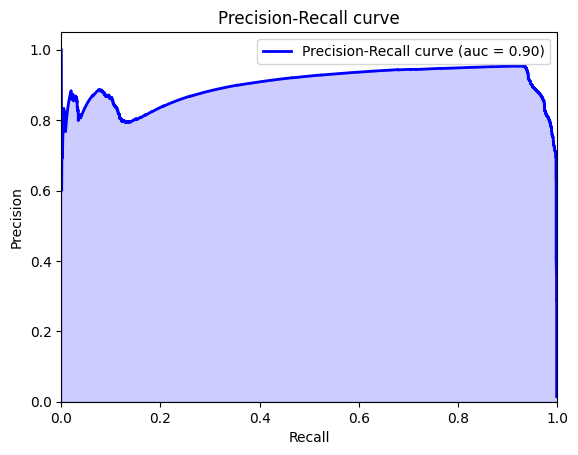



Accuracy: 0.9983292991428103
Confusion Matrix:
 [[270683    217]
 [   242   3593]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    270900
         1.0       0.94      0.94      0.94      3835

    accuracy                           1.00    274735
   macro avg       0.97      0.97      0.97    274735
weighted avg       1.00      1.00      1.00    274735



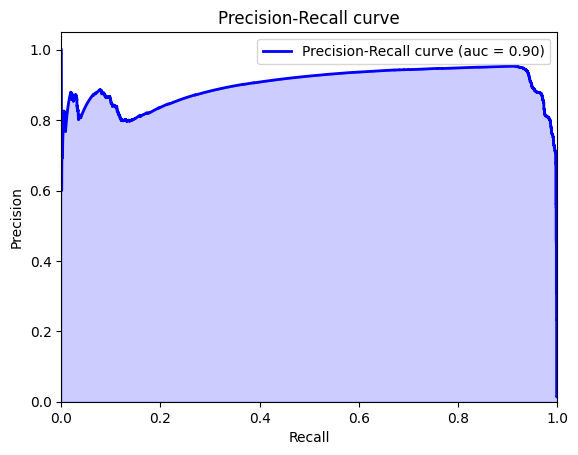



Accuracy: 0.9984494148907128
Confusion Matrix:
 [[270729    171]
 [   255   3580]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    270900
         1.0       0.95      0.93      0.94      3835

    accuracy                           1.00    274735
   macro avg       0.98      0.97      0.97    274735
weighted avg       1.00      1.00      1.00    274735



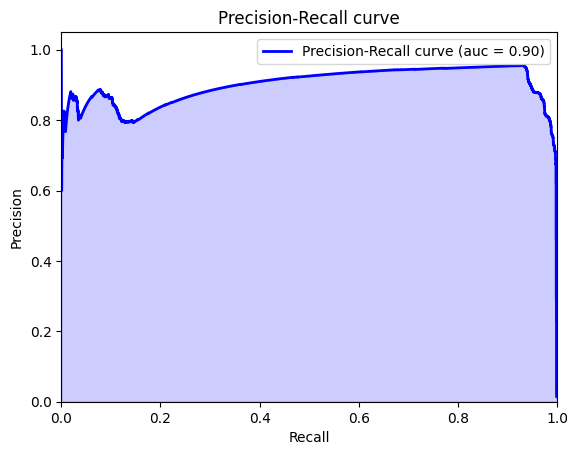



Accuracy: 0.9984603345041585
Confusion Matrix:
 [[270727    173]
 [   250   3585]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    270900
         1.0       0.95      0.93      0.94      3835

    accuracy                           1.00    274735
   macro avg       0.98      0.97      0.97    274735
weighted avg       1.00      1.00      1.00    274735



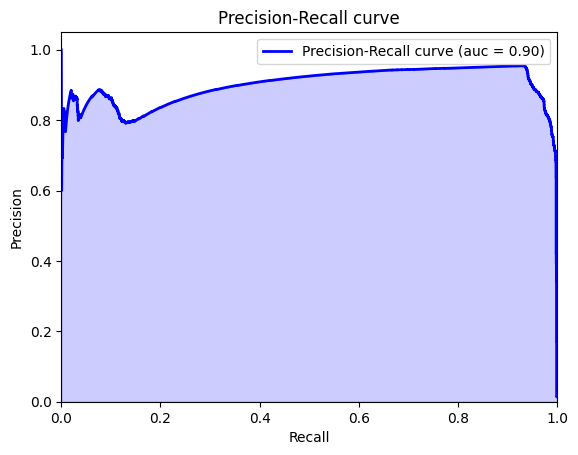



Accuracy: 0.9984603345041585
Confusion Matrix:
 [[270716    184]
 [   239   3596]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    270900
         1.0       0.95      0.94      0.94      3835

    accuracy                           1.00    274735
   macro avg       0.98      0.97      0.97    274735
weighted avg       1.00      1.00      1.00    274735



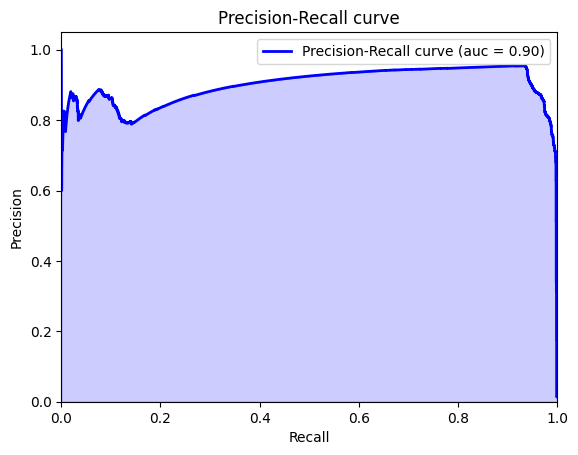

In [19]:
models_punctuation = {}
for index, option in enumerate(all_options):
    X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_from_reference(option, y)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_val_pred_prob = model.predict_proba(X_val)[:, 1]
    best_treshold = fn.get_best_treshold(y_val, y_val_pred_prob)
    y_val_pred = (y_val_pred_prob >= best_treshold)
    f_one_score = f1_score(y_val, y_val_pred)
    models_punctuation[index] = f_one_score
    
    fn.print_metrics(y_val, y_val_pred)
    fn.plot_precision_recall_curve(y_val, y_val_pred_prob)
    print('\n')

The best model will be the one with the highest f1 score.

In [20]:
best_model_index = max(models_punctuation, key=models_punctuation.get)
best_model_index

4

In [21]:
best_model_variables = all_options[best_model_index]

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_from_reference(best_model_variables, y)

In [22]:
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_test_pred = best_model.predict(X_test)

In [24]:
fn.print_metrics(y_test, y_test_pred)

Accuracy: 0.9971616315777405
Confusion Matrix:
 [[386882    254]
 [   860   4483]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    387136
         1.0       0.95      0.84      0.89      5343

    accuracy                           1.00    392479
   macro avg       0.97      0.92      0.94    392479
weighted avg       1.00      1.00      1.00    392479



In [25]:
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

best_threshold = fn.get_best_treshold(y_test, y_test_pred_proba)
print(best_threshold)

y_test_pred_threshold = y_test_pred_proba > best_threshold

fn.print_metrics(y_test, y_test_pred_threshold)

0.32669446136810637
Accuracy: 0.9983718874130845
Confusion Matrix:
 [[386872    264]
 [   375   4968]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    387136
         1.0       0.95      0.93      0.94      5343

    accuracy                           1.00    392479
   macro avg       0.97      0.96      0.97    392479
weighted avg       1.00      1.00      1.00    392479



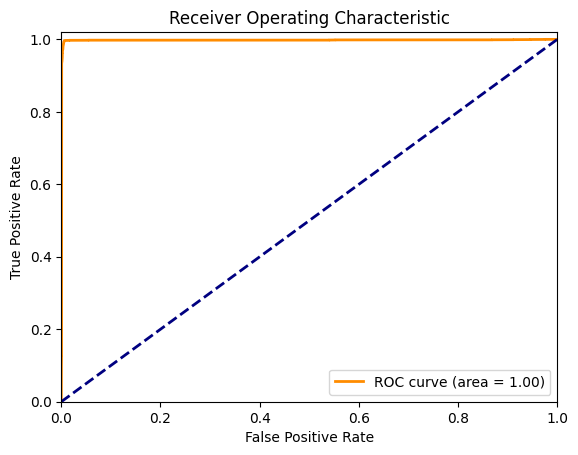

In [26]:
fn.plot_roc_curve(y_test, y_test_pred_proba)

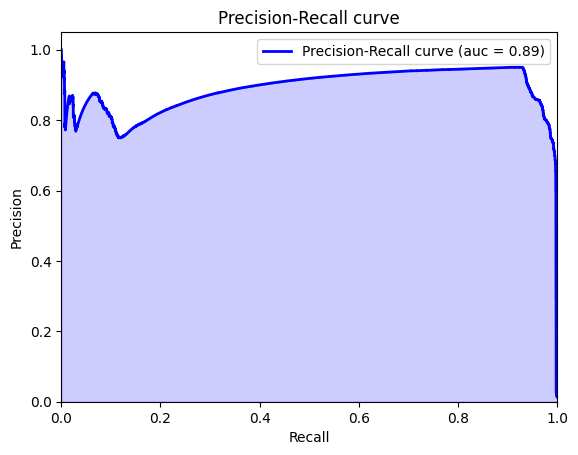

In [27]:
fn.plot_precision_recall_curve(y_test, y_test_pred_proba)

### Export the model

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(best_model_variables, y)

LogisticRegression(max_iter=1000)

In [29]:
MODEL_FILENAME = 'buy_prediction.pkl'
with open(MODEL_FILENAME, 'wb') as file:
    pickle.dump(model, file)

In [30]:
INFO_FILENAME = 'buy_prediction_info.txt'
with open(INFO_FILENAME, 'w') as file:
    info = f'{best_model_index}, {best_threshold}'
    file.write(info)

How to use the model file:

```python
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
```

## How to use the model

We get the variant_id and user_id as input and return 0 if the user is not likely to buy the product and 1 if the user is likely to buy the product.

In [31]:
model, model_variables, threshold = fn.get_model('buy_prediction')

In [32]:
df = pd.read_csv(DATA_PATH + DATA_FORMAT)

In [33]:
user_id = df['user_id'].iloc[0] # example
variant_id = df['variant_id'].iloc[2342] # example

In [34]:
df = fn.transform_dataset_to_fit_model(df)

It would be interesting to save the dataframe grouped by (user_id, variant_id) to use as input for the model.

In [35]:
user_variant_info = fn.get_user_variant_data(user_id, variant_id, df)

In [36]:
X = user_variant_info[model_variables]

In [37]:
fn.get_prediction(model, X, threshold)

0